Data Preprocessing

In [6]:
import pandas as pd
import seaborn as sns

In [9]:
# Put data in
file_path = 'project2.data.csv'

# Load the dataset
BC_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
BC_data.head()


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [10]:
# Identify the shape and size of the raw data
data_shape = BC_data.shape
data_size = BC_data.size

data_shape, data_size

((286, 10), 2860)

* The raw dataset consists of 286 rows and 10 columns, making its total size 2,860 data points (calculated as the product of the number of rows and columns). *

In [8]:
# Data type info
data_types_info =BC_data.dtypes

data_types_info

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

All columns except deg-malig are of type object. The deg-malig column is an integer (int64), which is appropriate if it represents numerical data.

In [11]:
# Missing data

# Treating invalid values '?' in 'node-caps' and 'breast-quad' columns by replacing them with the mode of their respective columns
for column in ['node-caps', 'breast-quad']:
    mode_value = BC_data[column].mode()[0]  # Getting the mode value
    BC_data[column] = BC_data[column].replace('?', mode_value)  # Replacing '?' with the mode value

# To verify, you can print the unique values in these columns to ensure '?' has been replaced
print("Updated unique values in 'node-caps':", BC_data['node-caps'].unique())
print("Updated unique values in 'breast-quad':", BC_data['breast-quad'].unique())


Updated unique values in 'node-caps': ['no' 'yes']
Updated unique values in 'breast-quad': ['left_low' 'right_up' 'left_up' 'right_low' 'central']


In [12]:
# Iterate through all columns in BC_data and count the occurrences of '?'
question_mark_counts = {column: (BC_data[column] == '?').sum() for column in BC_data.columns}

# Filter out columns that have no '?' values to simplify the output
question_mark_counts = {column: count for column, count in question_mark_counts.items() if count > 0}

# Display the counts of '?' in each column
print(question_mark_counts)

# Check if any '?' values are left in the data
if len(question_mark_counts) == 0:
    print("No '?' values left in the dataset.")
else:
    print("There are '?' values in the dataset:", question_mark_counts)

{}
No '?' values left in the dataset.


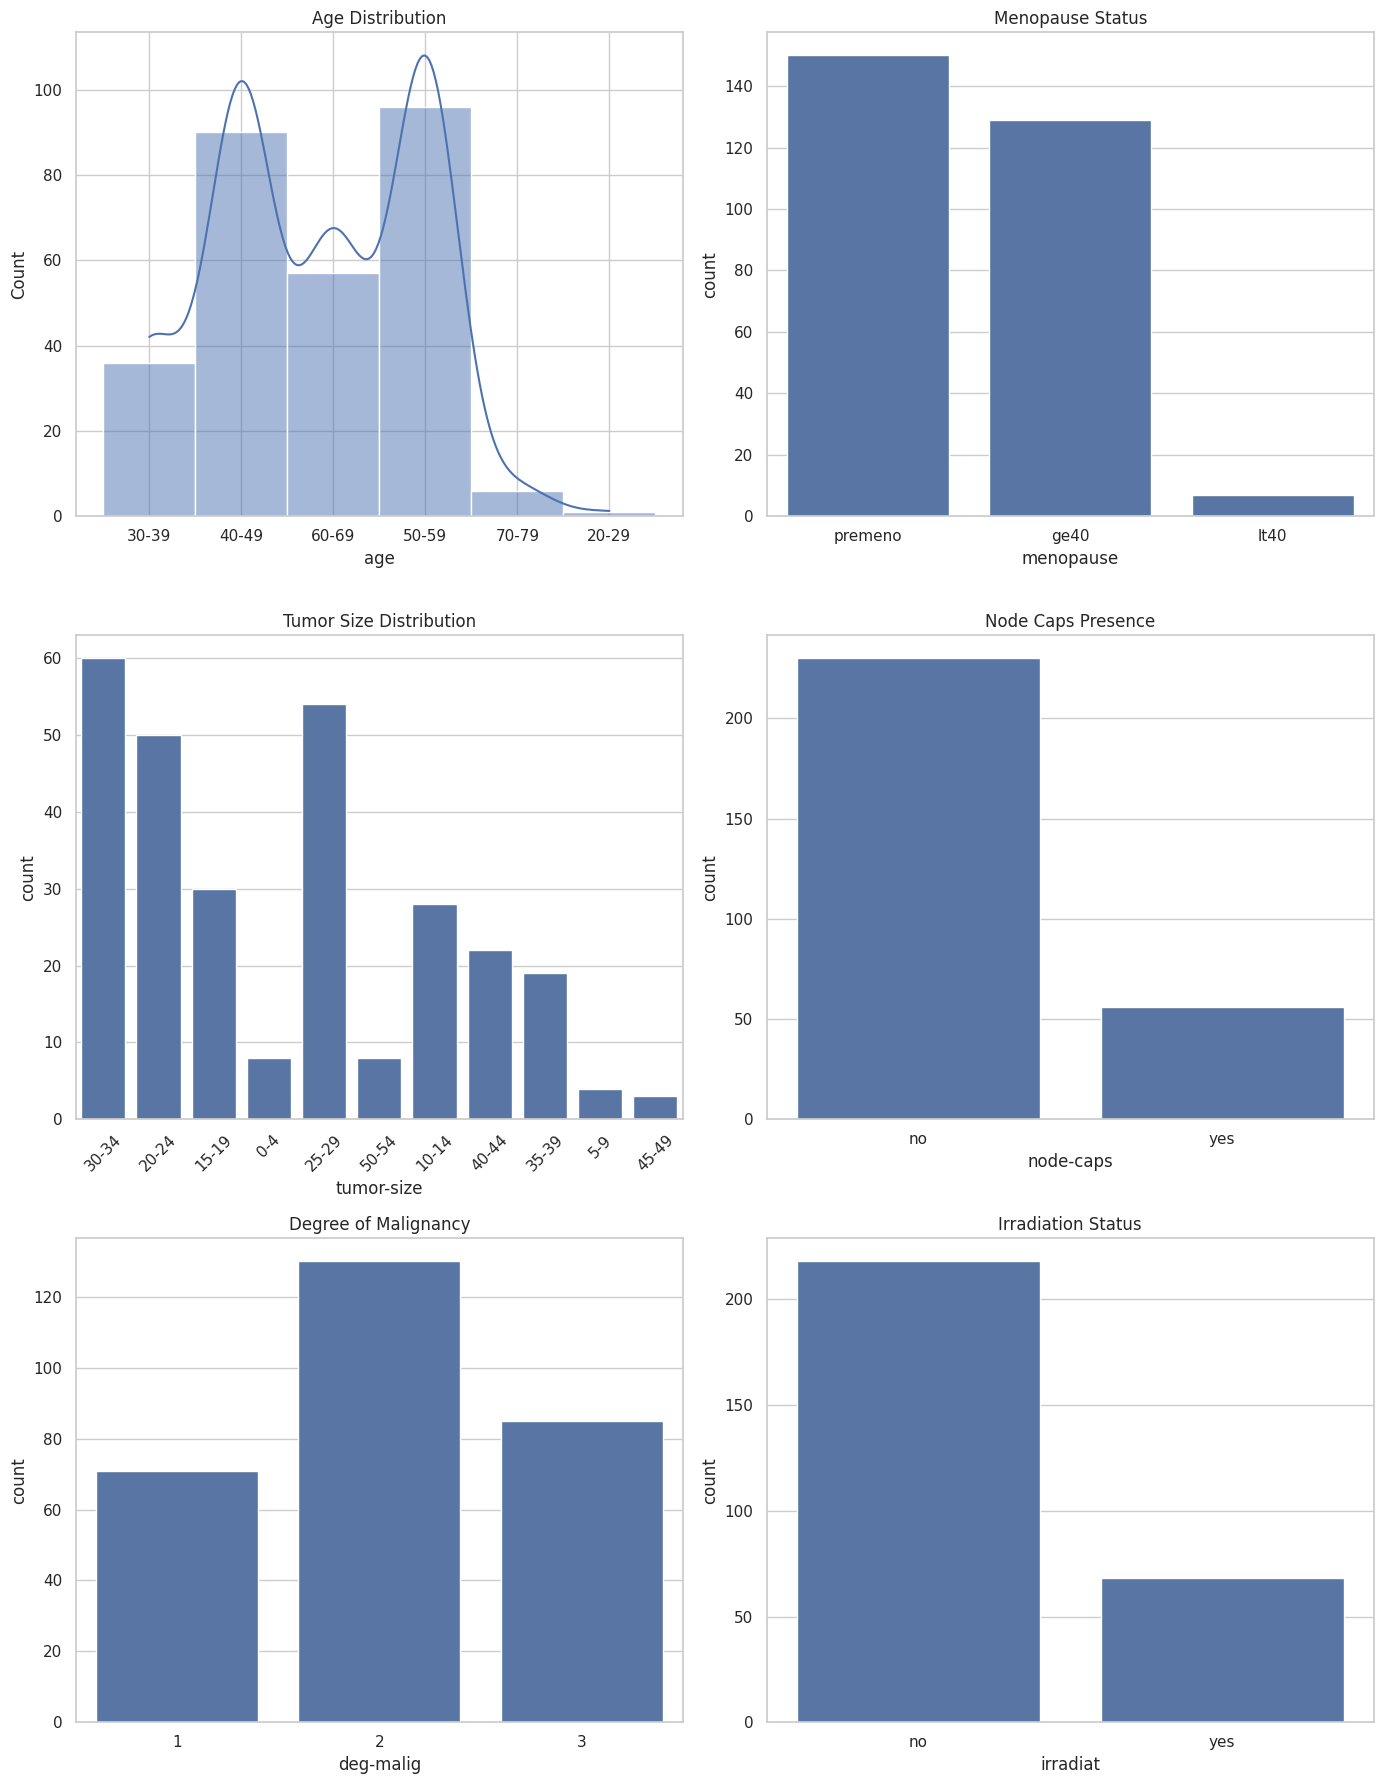

In [14]:
# Understanding the dataset 

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Univariate analysis through different visualizations using the correct dataset variable
# Histogram for 'age'
sns.histplot(data=BC_data, x='age', ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')

# Count plot for 'menopause'
sns.countplot(data=BC_data, x='menopause', ax=axes[0, 1])
axes[0, 1].set_title('Menopause Status')

# Count plot for 'tumor-size'
sns.countplot(data=BC_data, x='tumor-size', ax=axes[1, 0])
axes[1, 0].set_title('Tumor Size Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Count plot for 'node-caps'
sns.countplot(data=BC_data, x='node-caps', ax=axes[1, 1])
axes[1, 1].set_title('Node Caps Presence')

# Count plot for 'deg-malig'
sns.countplot(data=BC_data, x='deg-malig', ax=axes[2, 0])
axes[2, 0].set_title('Degree of Malignancy')

# Count plot for 'irradiat'
sns.countplot(data=BC_data, x='irradiat', ax=axes[2, 1])
axes[2, 1].set_title('Irradiation Status')

plt.tight_layout()
plt.show()

Age Distribution: The histogram of age shows that the dataset contains a range of age groups, with a peak in the 40-59 age range. This suggests that the majority of the dataset's subjects fall within this age bracket.

Menopause Status: The count plot for menopause status shows that premenopausal women constitute a significant portion of the dataset, followed by those in the ge40 category. This aligns with the age distribution and might reflect the biological or clinical relevance of these age groups to the study focus.

Tumor Size Distribution: Tumor sizes vary across a range of categories, with the 20-29 and 30-39 size ranges appearing most frequently. This indicates a commonality in tumor size among the subjects in the dataset, suggesting these ranges are particularly prevalent or of interest in the study.

Node Caps Presence: The presence of node caps is predominantly 'no', indicating that for most subjects, capsular penetration by tumor cells is not observed. A smaller number, however, do have node caps present.

Degree of Malignancy: The dataset contains subjects with varying degrees of malignancy (1, 2, and 3), with a relatively even distribution. This suggests the dataset encompasses a wide range of cancer severities.

Irradiation Status: A significant portion of the subjects have not undergone irradiation, as indicated by the count plot. However, a notable number have, which could be relevant for analyses related to treatment outcomes.

In [15]:
#One hot encoding

# Changing the yes no values to boolean
BC_data['class'] = BC_data['class'].map({'recurrence-events': 1, 'no-recurrence-events': 0})
BC_data['node-caps'] = BC_data['node-caps'].map({'yes': True, 'no': False})
BC_data['irradiat'] = BC_data['irradiat'].map({'yes': True, 'no': False})

# Identify categorical columns (assuming all except 'deg-malig' are categorical)
categorical_columns = [col for col in BC_data.columns if BC_data[col].dtype == 'object']

# Perform one-hot encoding on the identified categorical variables
BC_data_encoded = pd.get_dummies(BC_data, columns=categorical_columns)

# Display the first few rows of the dataframe to verify the one-hot encoding
BC_data_encoded.head

<bound method NDFrame.head of      class  node-caps  deg-malig  irradiat  age_20-29  age_30-39  age_40-49  \
0        0      False          3     False      False       True      False   
1        0      False          2     False      False      False       True   
2        0      False          2     False      False      False       True   
3        0      False          2     False      False      False      False   
4        0      False          2     False      False      False       True   
..     ...        ...        ...       ...        ...        ...        ...   
281      1      False          2     False      False       True      False   
282      1      False          3      True      False       True      False   
283      1      False          1     False      False      False      False   
284      1      False          3     False      False      False       True   
285      1      False          3     False      False      False      False   

     age_50-59  age_6

*Building and assessing models*

In [16]:
# Splitting the data into training and testing dataset

# x are the dependent variables and y is the target variable
X = BC_data_encoded.drop('class',axis=1)
y = BC_data_encoded['class']

# Library to split data
from sklearn.model_selection import train_test_split

# Spliting the data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

X_train.shape

(200, 37)

In [ ]:
X_test.shape

In [17]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Configure the KNN model
knn_search_accuracy = KNeighborsClassifier()

# Define a range of k values to test
param_grid = {'n_neighbors': range(1, 31)}

# Set up GridSearchCV to find the best k
grid_search = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross validation, scoring based on accuracy

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameter found
print("Best k value:", grid_search.best_params_)

# Best score
print("Best score:", grid_search.best_score_)

Best k value: {'n_neighbors': 21}
Best score: 0.735


In [18]:
# Running the K nearest neighbor simulation with the optimum K

from sklearn.metrics import accuracy_score

# Retrieve the best k value from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Configure the KNN model using the optimum k value
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the training set
knn_optimal.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_optimal.predict(X_test)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with k={best_k}: {test_accuracy}")

Test set accuracy with k=21: 0.7558139534883721


In [19]:
from sklearn.metrics import classification_report

# Print the classification report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn_optimal.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn_optimal.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        60
           1       1.00      0.19      0.32        26

    accuracy                           0.76        86
   macro avg       0.87      0.60      0.59        86
weighted avg       0.82      0.76      0.69        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       141
           1       0.81      0.22      0.35        59

    accuracy                           0.76       200
   macro avg       0.78      0.60      0.60       200
weighted avg       0.77      0.76      0.70       200



This model is good for precision but it should optimize for recall since the cost of false negatives are high in this context.


In [20]:
# implement a method that improves the model performance on the most important metric

# Define a range of k values to test
param_grid = {'n_neighbors': range(1, 31)}

# Set up GridSearchCV to find the best k, optimizing for recall
# Adjust scoring to 'recall' for binary classification
grid_search_recall = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring='recall')

# Fit the model
grid_search_recall.fit(X_train, y_train)

# Best parameter found for recall
best_k_recall = grid_search_recall.best_params_['n_neighbors']
print("Best k value for recall:", best_k_recall)

# Best recall score
best_recall_score = grid_search_recall.best_score_
print("Best recall score:", best_recall_score)

Best k value for recall: 3
Best recall score: 0.39090909090909093


In [21]:
# Configuring a new KNN model with the optimal k value for recall

knn_optimal_recall = KNeighborsClassifier(n_neighbors=best_k_recall)

# Training the model with the optimal k
knn_optimal_recall.fit(X_train, y_train)

# Print the classification report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn_optimal_recall.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn_optimal_recall.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        60
           1       0.37      0.27      0.31        26

    accuracy                           0.64        86
   macro avg       0.54      0.53      0.53        86
weighted avg       0.61      0.64      0.62        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       141
           1       0.94      0.58      0.72        59

    accuracy                           0.86       200
   macro avg       0.90      0.78      0.81       200
weighted avg       0.88      0.86      0.85       200



In [22]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)
  # print the report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        60
           1       0.50      0.31      0.38        26

    accuracy                           0.70        86
   macro avg       0.62      0.59      0.59        86
weighted avg       0.67      0.70      0.67        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       141
           1       0.66      0.39      0.49        59

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200



In [23]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        60
           1       0.37      0.27      0.31        26

    accuracy                           0.64        86
   macro avg       0.54      0.53      0.53        86
weighted avg       0.61      0.64      0.62        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       141
           1       1.00      0.90      0.95        59

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



[Text(0.7439959490740741, 0.96875, 'x[0] <= 0.5\ngini = 0.416\nsamples = 200\nvalue = [141, 59]'),
 Text(0.6083622685185185, 0.90625, 'x[13] <= 0.5\ngini = 0.34\nsamples = 161\nvalue = [126, 35]'),
 Text(0.58984375, 0.84375, 'x[27] <= 0.5\ngini = 0.375\nsamples = 140\nvalue = [105, 35]'),
 Text(0.4574652777777778, 0.78125, 'x[10] <= 0.5\ngini = 0.349\nsamples = 129\nvalue = [100, 29]'),
 Text(0.30497685185185186, 0.71875, 'x[1] <= 1.5\ngini = 0.337\nsamples = 126\nvalue = [99, 27]'),
 Text(0.05555555555555555, 0.65625, 'x[11] <= 0.5\ngini = 0.198\nsamples = 36\nvalue = [32, 4]'),
 Text(0.037037037037037035, 0.59375, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.07407407407407407, 0.59375, 'x[33] <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.037037037037037035, 0.53125, 'x[6] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.018518518518518517, 0.46875, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.05555555555555555, 0.46875, 'gini = 0.5\nsample

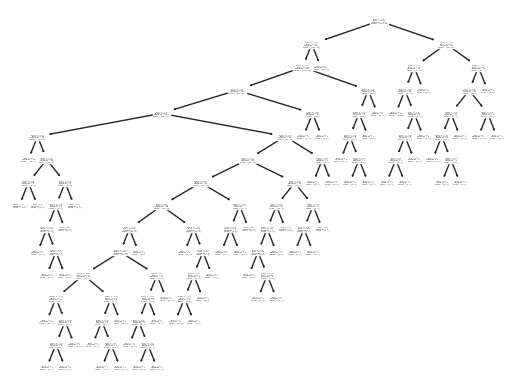

In [24]:
from sklearn import tree
tree.plot_tree(model)

Decision tree is way too complicated highlighting the overfitting.

In [34]:
# Randon Forest
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [35]:
model = gscv.best_estimator_

In [36]:
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        60
           1       0.31      1.00      0.47        26

    accuracy                           0.31        86
   macro avg       0.65      0.51      0.25        86
weighted avg       0.79      0.31      0.16        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.88      0.05      0.09       141
           1       0.30      0.98      0.46        59

    accuracy                           0.33       200
   macro avg       0.59      0.52      0.28       200
weighted avg       0.71      0.33      0.20       200

